In [ ]:
# Mach wave is a pressure wave traveling with the speed of sound caused by a slight change of pressure 
# added to a compressible flow. These weak waves can combine in supersonic flow to become a shock wave 
# if sufficient Mach waves are present at any location. [wiki]

In [75]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import statistics as stats

xdir = 0
ydir = 1
zdir = 2
fs = 12

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/'
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
    
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)

steps = sorted(reader.steps)

# Set the z slice
zslice = 1
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
print("Max steps: {}".format(max(steps)))


Domain size: 172.0 x 257.328125 x 82.0
Grid size: 256 x 384 x 128
Grid res: 0.671875 x 0.671875 x 0.640625
Max steps: 10


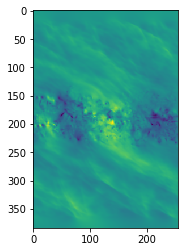

In [77]:
# Get pressure slice
reader.step = 10
p = reader.readData('p')
p = np.array(np.squeeze(p))
plt.imshow(np.transpose(p))

([], <a list of 0 Text yticklabel objects>)

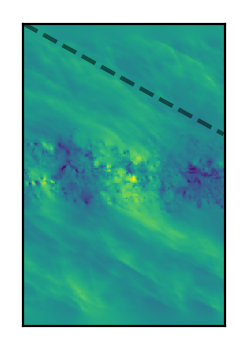

In [78]:
# Plot mach wave line (if supersonic)

xplot = np.linspace(0,Nx-2,10);
Mc = 1.2;
mu = np.arcsin(1./Mc)
mach_wave_line = xplot*np.cos(mu)

fig = plt.figure(figsize=(2,2),dpi=200)
plt.imshow(np.transpose(p))
plt.plot(xplot,mach_wave_line,'k--',alpha=0.5)
plt.xticks([])
plt.yticks([])

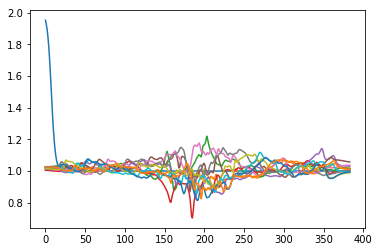

In [79]:
dy = Ly/Ny
filpt = 5./dy
thickT = 5.
filt = np.zeros(Ny)
for i in range(0,Ny):
    filt[i] = 0.5*( 1. - np.tanh((i-filpt)/thickT) )
plt.plot(filt+1)


for i in range(0,256,Nx/10):
    plt.plot(p[int(i),:])

    

(0.75, 1.25)

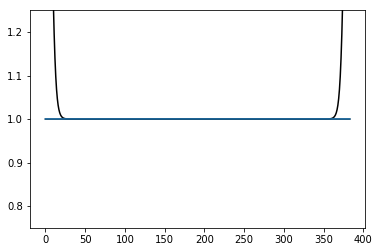

In [80]:
dy = Ly/Ny
filpt = 5./dy
thickT = 5.
filt = np.zeros(Ny)
for i in range(0,Ny):
    filt[i] = 0.5*( 1. - np.tanh((i-filpt)/thickT) )
plt.plot(filt+1,'k')
for i in range(0,Ny):
    filt[i] = 0.5*( 1. - np.tanh((Ny-i-filpt)/thickT) )
plt.plot(filt+1,'k')

for step in steps[4:5]:
    reader.step = step
    p = reader.readData('p')
    p = np.array(np.squeeze(p))
    plt.plot(p[Nx/2,:])
plt.ylim([0.75,1.25])

